## Part 2: Classification on red and white wine characteristics
#### First, import the red and the white wine csv files into separate pandas dataframes from the following website:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
 
#### Links to an external site.
#### (Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')
#### Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.
#### The target data (i.e. the dependent variable) is "winetype".


In [2]:
import pandas as pd
import numpy as np
white = pd.read_csv("data/winequality-white.csv", sep=';')
red = pd.read_csv("data/winequality-red.csv", sep=';')


In [3]:
## Create winetype column

white['winetype'] = 0
red['winetype'] = 1
white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
## Join dataframes
frames = [white, red]
wine = pd.concat(frames)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [6]:
## Shuffle rows
wine = wine.sample(frac=1)
wine['winetype'] = wine['winetype'].astype('category')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
2624,6.15,0.21,0.37,3.20,0.021,20.0,80.0,0.99076,3.39,0.47,12.0,5,0
295,10.80,0.50,0.46,2.50,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5,1
997,5.60,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7,1
3336,6.90,0.38,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,6,0
249,7.30,0.66,0.00,2.00,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6,1


In [7]:
#Check dtype of winetype variable to make sure it's categorical
wine.winetype.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

##### Wine Type:

In [8]:
import matplotlib.pyplot as plt
plt.title('Distribution of Wine Type (winetype)', fontsize = 15)
plt.xlabel('Wine Type', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
wine['winetype'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

I chose the three explanatory variables: sulphates, volatile acidity and density. I plotted them in box-plots, grouping them by winetype.

##### Sulphates:

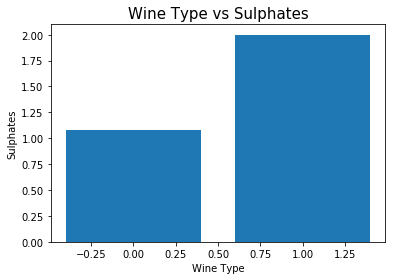

In [9]:
import matplotlib.pyplot as plt
plt.title('Wine Type vs Sulphates', fontsize = 15)
plt.xlabel('Wine Type', fontsize = 10)
plt.ylabel('Sulphates', fontsize = 10)
plt.bar(wine['winetype'], wine['sulphates'])
plt.show()

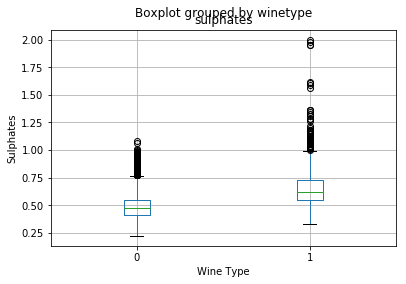

In [10]:
sulphates = wine[['sulphates', 'winetype']]
sulphates.boxplot(by='winetype')
plt.xlabel('Wine Type', fontsize = 10)
plt.ylabel('Sulphates', fontsize = 10)
plt.show()

##### Volatile Acidity:

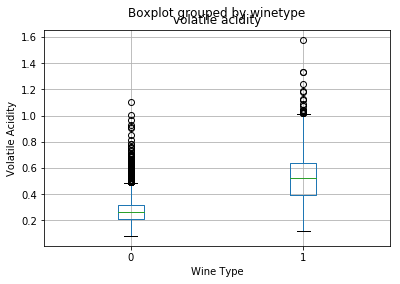

In [11]:
volatile_acidity = wine[['volatile acidity', 'winetype']]
volatile_acidity.boxplot(by='winetype')
plt.xlabel('Wine Type', fontsize = 10)
plt.ylabel('Volatile Acidity', fontsize = 10)
plt.show()

##### Density:

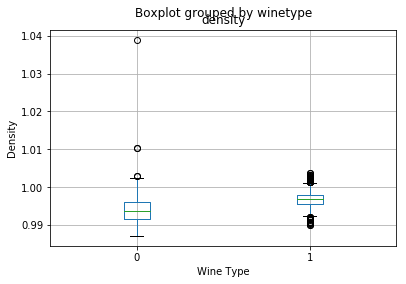

In [12]:
density = wine[['density', 'winetype']]
density.boxplot(by='winetype')
plt.xlabel('Wine Type', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?


In [13]:
X = wine.loc[:, wine.columns != 'winetype']
wine['winetype'] = wine['winetype'].astype('float64')

y = wine['winetype']

## Split data into training and testing sets:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)



#### Preprocessing

I chose to scale the dataset because there is a high degree of variation in the ranges of the different variables. 

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(preprocessing.scale(X_train), columns=['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
X_train_scaled.head()

y_train = y_train.astype('category')
y_test = y_test.astype('category')
y_train.head()

3244    0.0
3976    0.0
135     0.0
4226    0.0
172     1.0
Name: winetype, dtype: category
Categories (2, float64): [0.0, 1.0]

## Cross Validation: K-Nearest Neighbors Classifier:

I decided to carry out stratified k-fold cross validation (with 10 folds) in order to find out the accuracy of K-Neighbors Classifier with 5 neighbors for the test scores data. The scoring method chosen is R^2. (default)

K-Neighbors Classification:
Range of cross-validation scores: 
0.008196721311475419
Mean of cross validation scores: 
0.9924079133778587


Text(0.5, 0, 'R^2')

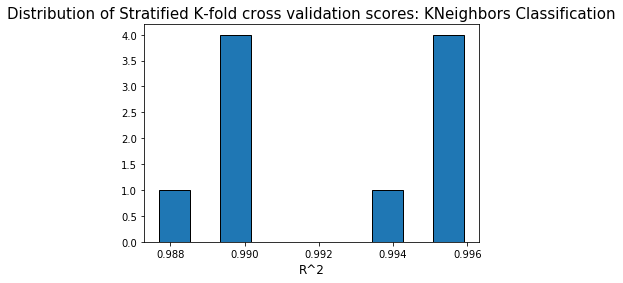

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

skf_scores_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=skf)
print("K-Neighbors Classification:")
print("Range of cross-validation scores: \n{}".format(max(skf_scores_knn) - min(skf_scores_knn)))
print("Mean of cross validation scores: \n{}".format(np.mean(skf_scores_knn)))
plt.hist(skf_scores_knn, ec='black', bins=10)
plt.title("Distribution of Stratified K-fold cross validation scores: KNeighbors Classification", fontsize=15)
plt.xlabel("R^2", fontsize=12)

## Cross Validation: Logistic Regression:

I decided to carry out stratified k-fold cross validation (with 10 folds) in order to find out the accuracy of Logistic Regression for the test scores data. The scoring method chosen is R^2. (default)
(Setting C to a high value in order to mimic unpenalized regression)

Logistic Regression:
Range of cross-validation scores: 
0.010245901639344246
Mean of cross validation scores: 
0.9934325035417932


Text(0.5, 0, 'R^2')

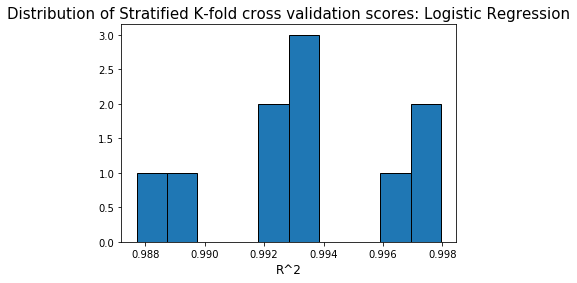

In [46]:
from sklearn.linear_model import LogisticRegression

skf_scores_logreg = cross_val_score(LogisticRegression(C=1e90), X_train_scaled, y_train, cv=skf)
print("Logistic Regression:")
print("Range of cross-validation scores: \n{}".format(max(skf_scores_logreg) - min(skf_scores_logreg)))
print("Mean of cross validation scores: \n{}".format(np.mean(skf_scores_logreg)))
plt.hist(skf_scores_logreg, ec='black', bins=10)
plt.title("Distribution of Stratified K-fold cross validation scores: Logistic Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)

## Cross Validation: Logistic Regression (with L2 penalization):

I decided to carry out stratified k-fold cross validation (with 10 folds) in order to find out the accuracy of Logistic Regression with the lgbfs solver and L2 penalization for the test scores data. I chose these methods because the best solver - 'saga' with an l1 penalty does not converge on this data. The scoring method chosen is R^2. (default) 

Logistic Regression (Penalized):
Range of cross-validation scores: 
0.010237468798488747
Mean of cross validation scores: 
0.9924070700937733


Text(0.5, 0, 'R^2')

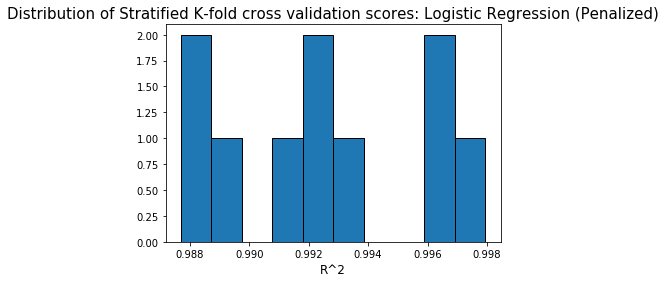

In [47]:
# Solver: lbfgs; Multinomial + L2 penalty

from sklearn.linear_model import LogisticRegression

skf_scores_logreg = cross_val_score(LogisticRegression(solver = 'lbfgs', penalty='l2'), X_train_scaled, y_train, cv=skf)
print("Logistic Regression (Penalized):")
print("Range of cross-validation scores: \n{}".format(max(skf_scores_logreg) - min(skf_scores_logreg)))
print("Mean of cross validation scores: \n{}".format(np.mean(skf_scores_logreg)))
plt.hist(skf_scores_logreg, ec='black', bins=10)
plt.title("Distribution of Stratified K-fold cross validation scores: Logistic Regression (Penalized)", fontsize=15)
plt.xlabel("R^2", fontsize=12)

The three cross-validation mean scores and score ranges are very similar to each other. The KNN Classifier mode displays the highest mean cross validation score. I decided to scale the variables because not scaling them resulted in less test accuracy.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

### GridSearch CV: Finding the best n_neighbors for K-Nearest Neighbors Classification

Test set score before parameter tuning is 0.992 and it increases to 0.9926, showing marginal improvement, because our guess of n_neighbors = 5 was close to the optimal n_neighbors = 6. 


In [48]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
print("Test set score: {:.9f}".format(knn.score(X_test_scaled, y_test)))

Test set score: 0.995076923


In [49]:
from sklearn.model_selection import GridSearchCV
import numpy as np


#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 15, 1)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train)

print("GridSearchCV - K-Nearest-Neighbors Classification:")
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Training-set score: {:.9f}".format(grid.score(X_train_scaled, y_train)))
print("Test-set score: {:.9f}".format(grid.score(X_test_scaled, y_test)))


GridSearchCV - K-Nearest-Neighbors Classification:
Best mean cross-validation score: 0.993
Best parameters: {'n_neighbors': 6}
Training-set score: 0.994252874
Test-set score: 0.995692308



### GridSearch CV: Finding the best C for Logistic Regression (penalized)

For penalized Logistic Regression there is not much of an improvement in accuracy since the optimal C is already close to 1, which is the default value.

In [50]:
logregp = LogisticRegression(solver='lbfgs', penalty='l2').fit(X_train_scaled, y_train)
print("Test set score: {:.9f}".format(logregp.score(X_test_scaled, y_test)))

Test set score: 0.995692308


In [51]:
param_grid = {'C': np.arange(0.1, 0.9, 0.1)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', penalty='l2'), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train)

print("GridSearchCV - Logistic Regression (Penalized):")
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.9f}".format(grid.score(X_test_scaled, y_test)))



GridSearchCV - Logistic Regression (Penalized):
Best mean cross-validation score: 0.992
Best parameters: {'C': 0.8}
Test-set score: 0.995692308


### Logistic Regression

Finally, Logistic Regression has no parameters to tune. Here is the test score for Logistic Regresssion, which produces greater test set accuracy than penalized Logistic Regression.

In [52]:
logreg = LogisticRegression(C=1e90).fit(X_train_scaled, y_train)
print("Test set score: {:.9f}".format(logreg.score(X_test_scaled, y_test)))

Test set score: 0.996923077


### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

## GridSearchCV (kfold with shuffle and random_state for train_test_split): K-Nearest Neighbors Regression

Using GridSearch with K-Fold shuffle, I decided to iterate over three random states to find out the different values. It is clear that stratified k-fold (which is the default for GridSearchCV on classifier models) and k-fold with shuffle at different seeds, produces different values and is hence unreliable for this dataset.

In [53]:
param_grid = {'n_neighbors': np.arange(1, 15, 1)} 

for k in (6, 123, 89):
    print("FOR VALUE {}\n:".format(k))
    kf = KFold(n_splits=10, shuffle = True, random_state = k)
    grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf)
    grid.fit(X_train_scaled, y_train)
    print("GridSearchCV - K-Nearest-Neighbors Classification:")
    #extract best score and parameter by calling objects "best_score_" and "best_params_"
    print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
    print("Best parameters: {}".format(grid.best_params_))
    print("Test-set score: {:.9f}".format(grid.score(X_test_scaled, y_test)))
    

FOR VALUE 6
:
GridSearchCV - K-Nearest-Neighbors Classification:
Best mean cross-validation score: 0.992
Best parameters: {'n_neighbors': 4}
Test-set score: 0.996307692
FOR VALUE 123
:
GridSearchCV - K-Nearest-Neighbors Classification:
Best mean cross-validation score: 0.993
Best parameters: {'n_neighbors': 1}
Test-set score: 0.996307692
FOR VALUE 89
:
GridSearchCV - K-Nearest-Neighbors Classification:
Best mean cross-validation score: 0.993
Best parameters: {'n_neighbors': 6}
Test-set score: 0.995692308


Next, I tried to change the random seed of the train_test_split to see if it would make a difference to the optimal parameter:

In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state = 789)
scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1_scaled = pd.DataFrame(preprocessing.scale(X_train1), columns=['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
X_test1_scaled = pd.DataFrame(scaler.transform(X_test1), columns= ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
X_train1_scaled.head()

y_train1 = y_train1.astype('category')
y_test1 = y_test1.astype('category')
y_train1.head()

2766    0.0
1575    1.0
475     1.0
4467    0.0
2585    0.0
Name: winetype, dtype: category
Categories (2, float64): [0.0, 1.0]

In [55]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train1_scaled, y_train1)

print("GridSearchCV - K-Nearest-Neighbors Classification:")
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Training-set score: {:.9f}".format(grid.score(X_train1_scaled, y_train1)))
print("Test-set score: {:.9f}".format(grid.score(X_test1_scaled, y_test1)))

GridSearchCV - K-Nearest-Neighbors Classification:
Best mean cross-validation score: 0.994
Best parameters: {'n_neighbors': 1}
Training-set score: 0.999589491
Test-set score: 0.994461538


## GridSearchCV (kfold with shuffle and random_state for train_test_split): Penalized Logistic Regression

Using GridSearch with K-Fold shuffle, I decided to iterate over three random states to find out the different values. It in interesting that  stratified k-fold (which is the default for GridSearchCV on classifier models) and k-fold with shuffle at different seeds changes the values of the C parameter showing that the Penalized regression is sensitive to the cross-validation shuffling, like KNN. The optimal parameter also changes when a different random seed is chosed for the train_test_split. 

In [56]:
param_grid = {'C': np.arange(0.1, 1, 0.1)} 

for k in (6, 123, 89):
    print("FOR VALUE {}\n:".format(k))
    kf = KFold(n_splits=10, shuffle = True, random_state = k)
    grid = GridSearchCV(LogisticRegression(solver='lbfgs', penalty='l2'), param_grid=param_grid, cv=kf)
    grid.fit(X_train_scaled, y_train)
    print("GridSearchCV - Penalized Logistic Regression:")
    #extract best score and parameter by calling objects "best_score_" and "best_params_"
    print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
    print("Best parameters: {}".format(grid.best_params_))
    print("Test-set score: {:.9f}".format(grid.score(X_test_scaled, y_test)))
    

FOR VALUE 6
:
GridSearchCV - Penalized Logistic Regression:
Best mean cross-validation score: 0.992
Best parameters: {'C': 0.4}
Test-set score: 0.995692308
FOR VALUE 123
:
GridSearchCV - Penalized Logistic Regression:
Best mean cross-validation score: 0.992
Best parameters: {'C': 0.7000000000000001}
Test-set score: 0.995692308
FOR VALUE 89
:
GridSearchCV - Penalized Logistic Regression:
Best mean cross-validation score: 0.992
Best parameters: {'C': 0.9}
Test-set score: 0.995692308


In [57]:
grid = GridSearchCV(LogisticRegression(solver='lbfgs', penalty='l2'), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train1_scaled, y_train1)

print("GridSearchCV - Penalized Logistic Regression:")
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Training-set score: {:.9f}".format(grid.score(X_train1_scaled, y_train1)))
print("Test-set score: {:.9f}".format(grid.score(X_test1_scaled, y_test1)))

GridSearchCV - Penalized Logistic Regression:
Best mean cross-validation score: 0.993
Best parameters: {'C': 0.9}
Training-set score: 0.993637110
Test-set score: 0.995076923


### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.


Both tests display similar coefficients, though logistic regression has the added advantage of simplicity and the ability to test for the significance of each individual variable. 
Volatile acidity, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, and Alcohol
Mare statistically significant predictors at a 99% confidence interval. However, Fixed acidity and volatile acidity may be highly correlated. Hence, a composite factor for both can be included.
I choose Logistic Regression because it has greater model interpretability. Moreover, the test and train accuracy for logistic regression is higher than penalized logistic regression.

In [58]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_scaled)
y_train = list(y_train)

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4872
Model:                            GLM   Df Residuals:                     4859
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -183.79
Date:                Thu, 11 Oct 2018   Deviance:                       367.57
Time:                        09:32:34   Pearson chi2:                 8.49e+07
No. Iterations:                    11   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.8710      0.295    -13.131      0.000      -4.449      -3.293
fixed acidity           -0.1803      0.326     -0.554      0.580      -0.818       0.458
volatile acidity         1.1580      0.193      6.012      0.000       0.780       1.536
citric acid             -0.3426      0.191     -1.795      0.073      -0.717       0.031
residual sugar          -4.0145      0.488     -8.225      0.000      -4.971      -3.058
chlorides                0.8503      0.159      5.352      0.000       0.539       1.162
free sulfur dioxide      0.7529      0.288      2.610      0.009       0.188       1.318
total sulfur dioxide    -2.6935      0.292     -9.224      0.000      -3.266      -2.121
density                  4.7390      0.587      8.075      0.000       3.589       5.889
pH                      -0.0158      0.248     -0.064      0.949      -0.502       0.470
sulphates                0.4588      0.208      2.210      0.027       0.052       0.866
alcohol                  1.7099      0.340      5.027      0.000       1.043       2.377
quality                  0.4742      0.192      2.468      0.014       0.098       0.851
========================================================================================
"""

Coefficients:

fixed acidity  :  0.487903380433066
volatile acidity  :  1.2590493841457362
citric acid  :  -0.3075331376775412
residual sugar  :  -2.5502776367046534
chlorides  :  0.9225416957200209
free sulfur dioxide  :  0.3961594428991161
total sulfur dioxide  :  -2.4493491295271568
density  :  2.9234134636805043
pH  :  0.4880078208297348
sulphates  :  0.662677870023479
alcohol  :  0.8797657462147017
quality  :  0.38272435676752503


Training set score: 0.994
Test set score: 0.997


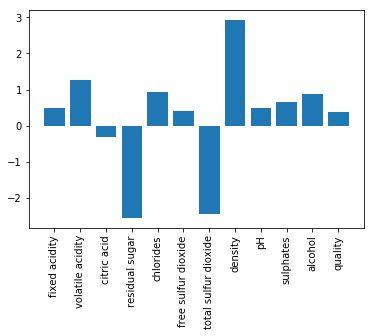

In [59]:
logregp = LogisticRegression(C=0.6, solver = 'lbfgs', penalty='l2').fit(X_train_scaled, y_train)
print("Coefficients:\n")
cols =['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
coefs = logregp.coef_.ravel()
for k in range(0, len(cols)):
    print(cols[k], " : ", coefs[k])
plt.bar(cols, coefs)
plt.xticks(rotation=90)
print("\n")
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))



In [1]:
np.corrcoef(wine['fixed acidity'], wine['volatile acidity'])

NameError: name 'np' is not defined

<Figure size 432x288 with 0 Axes>

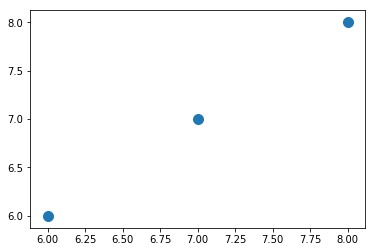

In [16]:
plt.figure()
X= np.array([1,2,3,4,5,6,7,8])
Y = X
plt.figure()
plt.scatter(X[5:], Y[5:], s = 100)
plt.show()